<a href="https://colab.research.google.com/github/AinunRofiq/M.Ainun-Rofiq/blob/main/Proses_DecisionTree%20BAB%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split

In [9]:
from google.colab import files
files.upload()

Saving PROSES DECISION TREE TEST.csv to PROSES DECISION TREE TEST (1).csv


{'PROSES DECISION TREE TEST (1).csv': b"No,Nama Siswa,Status Ayah,Status Ibu,Penghasilan Ayah,Penghasilan Ibu,Kepemilikan Rumah,Jumlah Tanggungan,KIS Atau SKTM,Nilai Rata-Rata,Keterangan\r\n1,Abdul Hayyi,Hidup,Hidup,Sedang,Rendah,Sendiri,Rendah,Tidak,Baik,Tidak Layak\r\n2,Abdul Jabar Zain,Hidup,Hidup,Sedang,Rendah,Sendiri,Rendah,Tidak,Baik Sekali,Tidak Layak\r\n3,Abdul Majid Muqaddim,Hidup,Hidup,Tinggi,Sedang,Sendiri,Sedang,Tidak,Baik,Tidak Layak\r\n4,Abdulloh,Wafat,Hidup,Tidak,Sedang,Sendiri,Rendah,Ya,Baik,Layak\r\n5,Ach. Taufiqir Rahman,Hidup,Hidup,Sedang,Rendah,Sendiri,Rendah,Tidak,Baik,Tidak Layak\r\n6,Achmad Asrori ,Hidup,Hidup,Sedang,Rendah,Sendiri,Rendah,Tidak,Baik,Tidak Layak\r\n7,Achmad Asyrofy,Hidup,Hidup,Sedang,Tinggi,Sendiri,Sedang,Tidak,Baik Sekali,Tidak Layak\r\n8,Achmad Choirul Anam,Hidup,Hidup,Sedang,Rendah,Sendiri,Rendah,Tidak,Baik,Tidak Layak\r\n9,Achmad Fadhil Arviansyah,Hidup,Bercerai,Sedang,Tidak,Sendiri,rendah,Tidak,Baik,Layak\r\n10,Achmad Rafiqi Albar,Hidup,Hidup

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split

datainput = pd.read_csv("PROSES DECISION TREE TEST.csv", delimiter=",")

# Memilih kolom yang relevan untuk fitur (x) dan target (y)
x = datainput[['Status Ayah', 'Status Ibu', 'Penghasilan Ayah', 'Penghasilan Ibu', 'Kepemilikan Rumah', 'Jumlah Tanggungan', 'KIS Atau SKTM', 'Nilai Rata-Rata']]
y = datainput["Keterangan"]

# Lakukan pemisahan data latih dan data uji
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

# Memeriksa bentuk data latih dan data uji
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(185, 8)
(80, 8)
(185,)
(80,)


In [11]:
import pandas as pd
from sklearn import preprocessing

datainput = pd.read_csv("PROSES DECISION TREE TEST.csv", delimiter=",")

x = datainput[['Status Ayah','Status Ibu','Penghasilan Ayah','Penghasilan Ibu','Kepemilikan Rumah','Jumlah Tanggungan','KIS Atau SKTM','Nilai Rata-Rata']]

# Pemrosesan awal data untuk kolom kategorikal (Status Ayah, Status Ibu, Penghasilan Ayah, Penghasilan Ibu, Kepemilikan Rumah, Jumlah Tanggungan, KIS Atau SKTM, Nilai Rata-Rata)
label_encoder = preprocessing.LabelEncoder()

x['Status Ayah'] = label_encoder.fit_transform(x['Status Ayah'])
x['Status Ibu'] = label_encoder.fit_transform(x['Status Ibu'])
x['Penghasilan Ayah'] = label_encoder.fit_transform(x['Penghasilan Ayah'])
x['Penghasilan Ibu'] = label_encoder.fit_transform(x['Penghasilan Ibu'])
x['Kepemilikan Rumah'] = label_encoder.fit_transform(x['Kepemilikan Rumah'])
x['Jumlah Tanggungan'] = label_encoder.fit_transform(x['Jumlah Tanggungan'])
x['KIS Atau SKTM'] = label_encoder.fit_transform(x['KIS Atau SKTM'])
x['Nilai Rata-Rata'] = label_encoder.fit_transform(x['Nilai Rata-Rata'])

<ipython-input-11-a4dcac7ce4cd>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Status Ayah'] = label_encoder.fit_transform(x['Status Ayah'])
<ipython-input-11-a4dcac7ce4cd>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Status Ibu'] = label_encoder.fit_transform(x['Status Ibu'])
<ipython-input-11-a4dcac7ce4cd>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio


DecisionTree's Accuracy: 0.9625


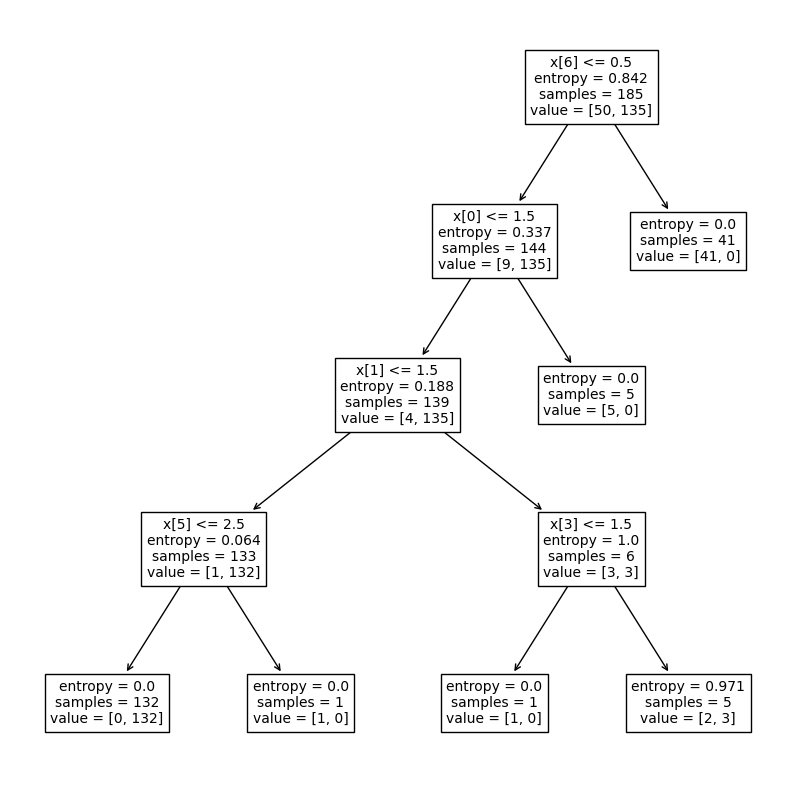

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt  # Impor matplotlib untuk membuat plot
from sklearn.tree import DecisionTreeClassifier, plot_tree  # Impor fungsi plot_tree

# Dengan asumsi 'x' berisi fitur Anda dan 'y' berisi variabel target Anda

# Enkode variabel kategori menggunakan LabelEncoder
label_encoder = LabelEncoder()
for col in x.columns:
    if x[col].dtype == 'object':  # Periksa apakah kolomnya kategorikal
        x[col] = label_encoder.fit_transform(x[col])

# Pisahkan data menjadi set pelatihan dan pengujian
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

# Inisialisasi dan sesuaikan DecisionTreeClassifier
Tree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
Tree.fit(x_train, y_train)

# Prediksi menggunakan model terlatih
predicted = Tree.predict(x_test)

# Menghitung dan mencetak akurasi
print("\nDecisionTree's Accuracy:", accuracy_score(y_test, predicted))

# Plot pohon keputusan
plt.figure(figsize=(10, 10))
plot_tree(Tree, fontsize=10)
plt.show()

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Dengan asumsi Tree adalah instance DecisionTreeClassifier
Tree.fit(x_train, y_train)
predicted = Tree.predict(x_test)
cm = confusion_matrix(y_test, predicted)
print("Confusion matrix =", cm)
print("Predicted values:", predicted)

Confusion matrix = [[18  3]
 [ 0 59]]
Predicted values: ['Tidak Layak' 'Tidak Layak' 'Tidak Layak' 'Tidak Layak' 'Tidak Layak'
 'Tidak Layak' 'Tidak Layak' 'Tidak Layak' 'Tidak Layak' 'Layak'
 'Tidak Layak' 'Tidak Layak' 'Tidak Layak' 'Tidak Layak' 'Tidak Layak'
 'Layak' 'Tidak Layak' 'Tidak Layak' 'Tidak Layak' 'Layak' 'Layak'
 'Tidak Layak' 'Tidak Layak' 'Layak' 'Layak' 'Tidak Layak' 'Layak'
 'Tidak Layak' 'Layak' 'Tidak Layak' 'Tidak Layak' 'Tidak Layak'
 'Tidak Layak' 'Tidak Layak' 'Layak' 'Layak' 'Tidak Layak' 'Tidak Layak'
 'Tidak Layak' 'Tidak Layak' 'Layak' 'Tidak Layak' 'Tidak Layak'
 'Tidak Layak' 'Layak' 'Layak' 'Layak' 'Tidak Layak' 'Tidak Layak'
 'Tidak Layak' 'Tidak Layak' 'Tidak Layak' 'Tidak Layak' 'Layak'
 'Tidak Layak' 'Tidak Layak' 'Tidak Layak' 'Tidak Layak' 'Tidak Layak'
 'Tidak Layak' 'Tidak Layak' 'Layak' 'Tidak Layak' 'Tidak Layak'
 'Tidak Layak' 'Tidak Layak' 'Layak' 'Layak' 'Tidak Layak' 'Tidak Layak'
 'Tidak Layak' 'Tidak Layak' 'Tidak Layak' 'Tidak Layak' 'T

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Dengan asumsi Tree adalah instance DecisionTreeClassifier
Tree.fit(x_train, y_train)
predicted = Tree.predict(x_test)
cm = confusion_matrix(y_test, predicted)
akurasi = accuracy_score(y_test, predicted)
print("DecisionTrees's Accuracy (%)", akurasi * 100)

DecisionTrees's Accuracy (%) 96.25
